## Линейная регрессия

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

plt.style.use("ggplot")

%matplotlib inline

Линейная регрессия используется в обучении с учителем, когда у нас есть объясняемая (эндогенная) переменная и есть факторы, ее объясняющие (экзогенные переменные).

Вид уравнения:

$y = \alpha + \beta X +\epsilon_i $ or (more commonly) $ y = mx + b$

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon_i$

Мы решаем задачу минимизации суммы квадратов ошибок:

$$ E=\sum_{i=1}^N\varepsilon_i^2= \sum_{i=1}^N[y_i-(ax_i+b)]^2 $$

Или в матричном виде:

\begin{equation*} RSS(\beta) = (Y-X\beta)^T(Y-X\beta) \end{equation*}

Решение:

\begin{equation*} \beta^{OLS} = (X^TX)^{-1}X^TY \end{equation*}

#### Условия Гаусса-Маркова

- детерминированность X
- $E(e_i) = 0$
- $V(e_i) = \sigma^2$
- $cov(e_i, e_j) = 0$ для любых i<>j

При соблюдении условии ГМ линейная регрессия будет являться наилучшей несмещенной оценкой линейной взаимосвязи между 
переменными:

$E[Y|X] = X\beta$

Нам нужно чтобы $X^TX$ была невырожденной

Нарушения условия:

- мультиколлинеарность (корреляция между экзогенными (независимыми) переменными
- гетероскедастичность - зависимость дисперсии от независимых переменных
- автокорреляция ошибок (нарушение последнего условия ГМ)

#### Линейная регрессия в statsmodels

In [2]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(987678)

In [3]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

Целевая переменная - sales, независимые - TV, Radio, Newspaper

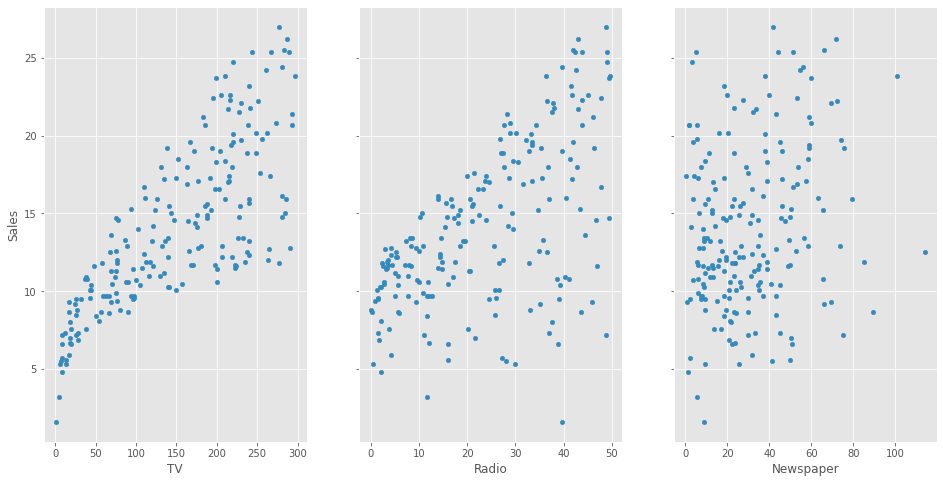

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

(источник - https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)

<img src="08_estimating_coefficients.png">





оценка МНК:
<img src="08_slope_intercept.png">

In [6]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Придумаем тестовую выборку и сделаем прогнозы:

In [7]:
X_test = pd.DataFrame({'TV': [30, 120, 70, 13]})
X_test.head()

,TV
0,30
1,120
2,70
3,13


In [8]:
lm.predict(X_test)

0     8.458693
1    12.736990
2    10.360158
3     7.650570
dtype: float64

In [9]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

<Figure size 864x720 with 0 Axes>

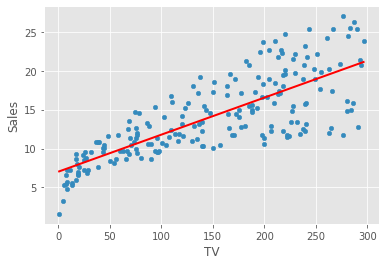

In [11]:
# first, plot the observed data
plt.figure(figsize=(12, 10))
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

Давайте будем использовать все переменные:

In [12]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        10:13:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src="TSS_ESS_RSS.png">

#### 1. $R^2$ - коэффициент детерминации

Когда переменная только одна, то это просто ESS/TSS

В случае множественной регрессии используем поправку:

$ R_a^2 = R^2-(1-R^2)(p-1)/(n-p)$, где n-количество точек, p - количество переменных

#### 2. t-test - статистический тест на равенство коэффициента 0

#### 3. F-критерий (фишера)

Нулевая гипотеза - все коэффициенты равны 0. Альтернатива - хотя бы 1 не равен 0.

$F = ((RSS_0-RSS_1)/(p_1-p_0))/RSS_1/(n-p_1-p_0)$

#### 4. log likelihood

#### 5. Критерий Акайке 

$AIC = 2p-2ln(L)$

#### 5. Критерий Шварца 

$BIC = pln(n)-2ln(L)$

#### 6. omnibus test - тест на нормальность распределения остатков

#### 7. cond. number - численная мера стабильности матрицы (отношение максимального сингулярного числа к минимальному)

Посмотрим на график распределения остатков:

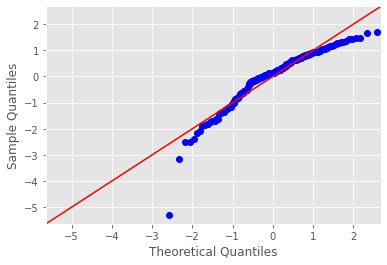

In [14]:
import scipy.stats as sc

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
res = lm.resid
figure = sm.qqplot(res, sc.norm, fit=True, line='45')
plt.show()

Мультиколлинеарность

In [15]:
data.iloc[:, :3].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


#### Тесты на гомоскедастичность

In [16]:
from statsmodels.stats import diagnostic as ols_d
temp = data.iloc[:, :3]
temp['const'] = 1

Тест Бреуша-Пагана

In [17]:
ols_d.het_breuschpagan(res, temp)

(5.132872353285545,
 0.16232215845412826,
 1.7209042102915657,
 0.16399908905607694)

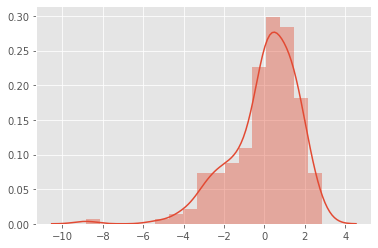

In [18]:
import seaborn as sns

sns.distplot(res)

### Как выбрать модель?

Условно можно поделить на "ручные" и нет.

- F-test
- AIC/BIC
- автокорреляция остатков
- тесты на гомоскедастичность остатков
- $R^2$

### RANSAC (робастная регрессия)

источник - https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


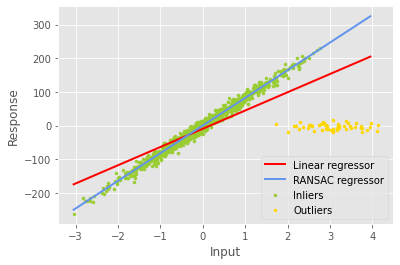

In [19]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='red', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

## Перерыв до 21:00

### Временные ряды

Особенности:

- выборка не является независимой
- есть автокорреляция ошибок
- могут быть сезонные колебания
- могут быть тренды

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [21]:
data=pd.read_csv('AirPassengers.csv')
print(data.shape)
data.head(3)

(144, 2)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


Одним и важнейших понятий в анализе временных рядов является стационарность. 

Принято различать стационарность в двух смыслах:
1. строгая: сдвиг во времени не меняет распределение
2. слабая: среднее и дисперсия являются постоянными и не зависят от времени. Также функция автокорреляции зависит от сдвига (лага)

Функция автокорреляции

<img src="autocorr.png">

In [22]:
import datetime as dt
data = pd.read_csv('AirPassengers.csv')
data['Month'] = data['Month'].apply(lambda dates: dt.datetime.strptime(dates, '%Y-%m'), 1)
data.index = data['Month']
data = data.drop('Month', 1)
data.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [23]:
ts = data['Passengers']
ts.head(3)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: Passengers, dtype: int64

In [24]:
ts['1949-02-01':'1952-01-01']

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
1951-07-01    199
1951-08-01    199
1951-09-01    184
1951-10-01    162
1951-11-01    146
1951-12-01    166
1952-01-01    171
Name: Passengers, dtype: int64

In [25]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: Passengers, dtype: int64

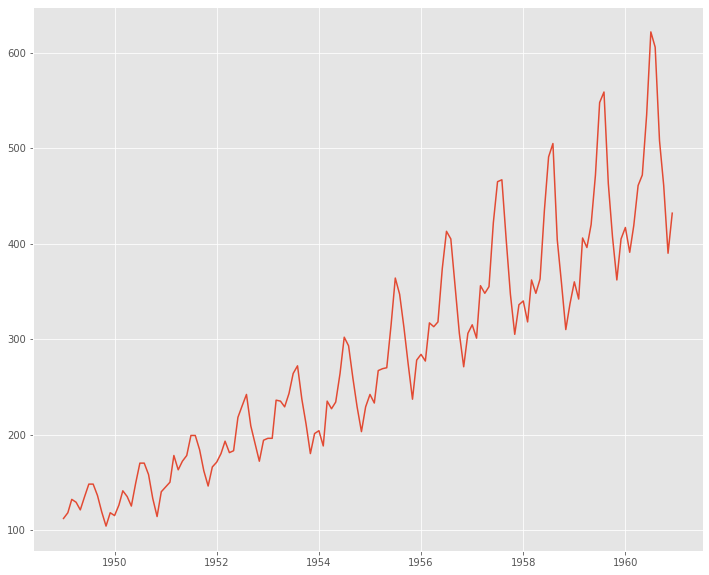

In [26]:
plt.figure(figsize=(12, 10))
plt.plot(ts)

1. Можно ли назвать этот ряд стационарным? (мы все равно потом проверим с помощью теста Дики-Фуллера)

Построим две автокорреляционные функции (частную и общую):

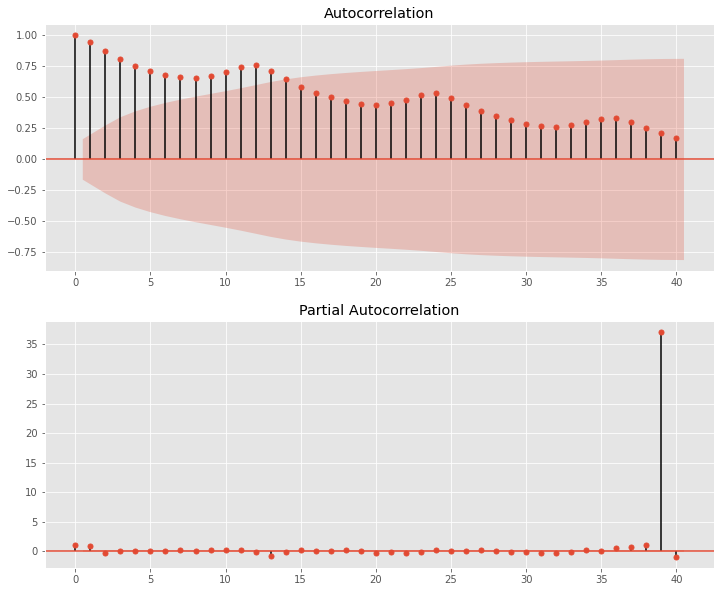

In [27]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)

Ряд нестационарен. Что делать?

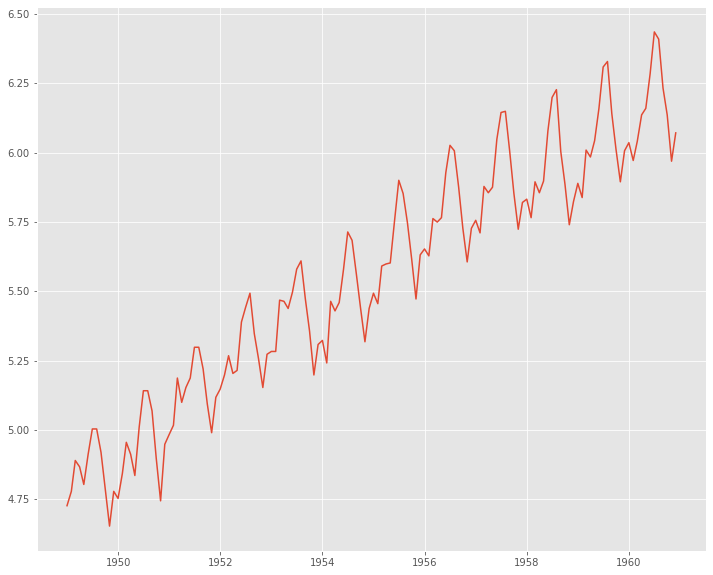

In [28]:
plt.figure(figsize=(12, 10))
ts_log = np.log1p(ts)
plt.plot(ts_log)

#### Скользящее среднее

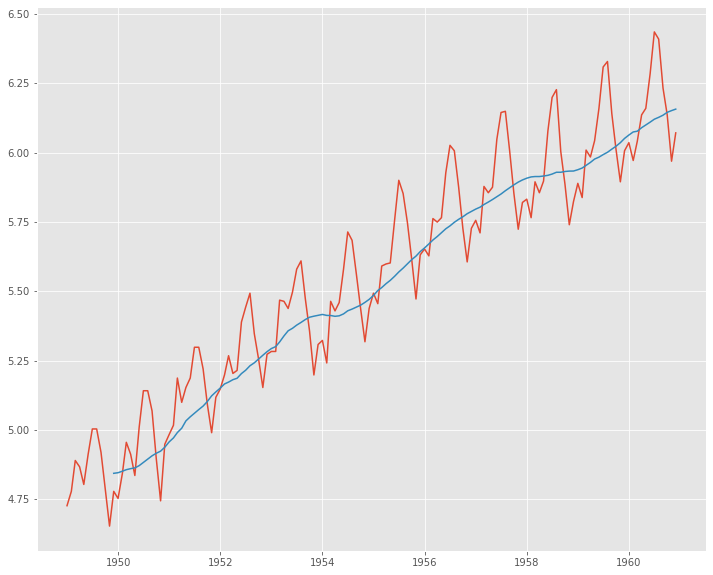

In [29]:
plt.figure(figsize=(12, 10))
ma = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(ma)

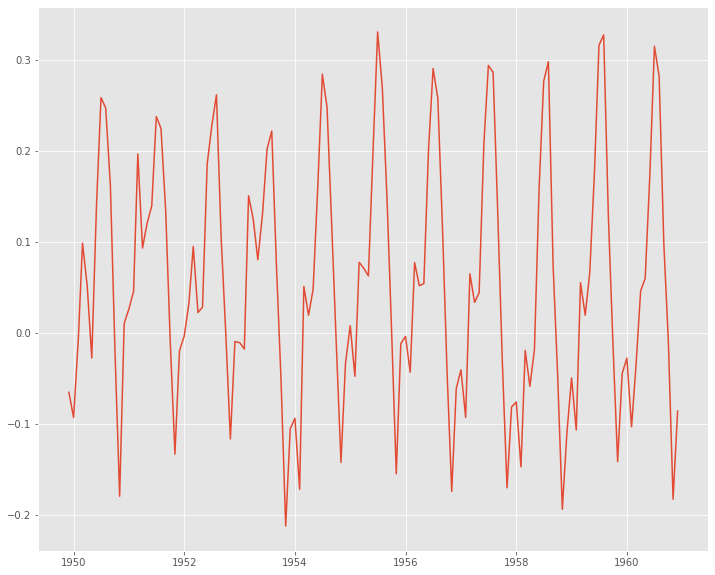

In [30]:
plt.figure(figsize=(12, 10))
ts_log_ma_diff = ts_log-ma
ts_log_ma_diff.dropna(inplace=True)
plt.plot(ts_log_ma_diff)

Полученный ряд очень похож на стационарный. Значения "колеблются" вокруг 0

#### экспоненциальное сглаживание

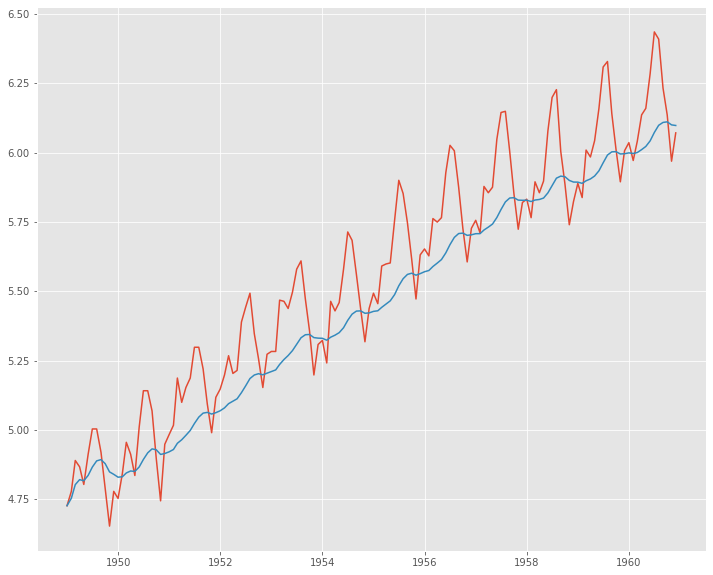

In [31]:
plt.figure(figsize=(12, 10))
exp_avg = ts_log.ewm(12).mean()
plt.plot(ts_log)
plt.plot(exp_avg)

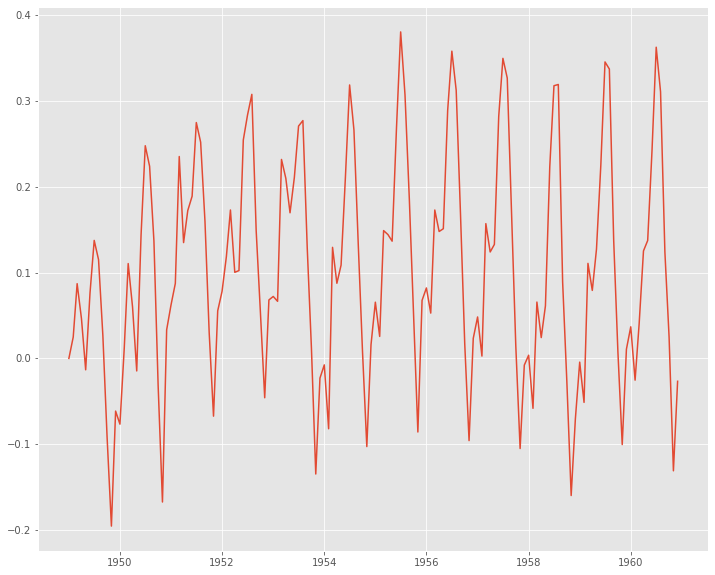

In [32]:
plt.figure(figsize=(12, 10))
ts_log_ewma_diff = ts_log-exp_avg
ts_log_ewma_diff.dropna(inplace=True)
plt.plot(ts_log_ewma_diff)

#### Избавимся от тренда: разность первого порядка

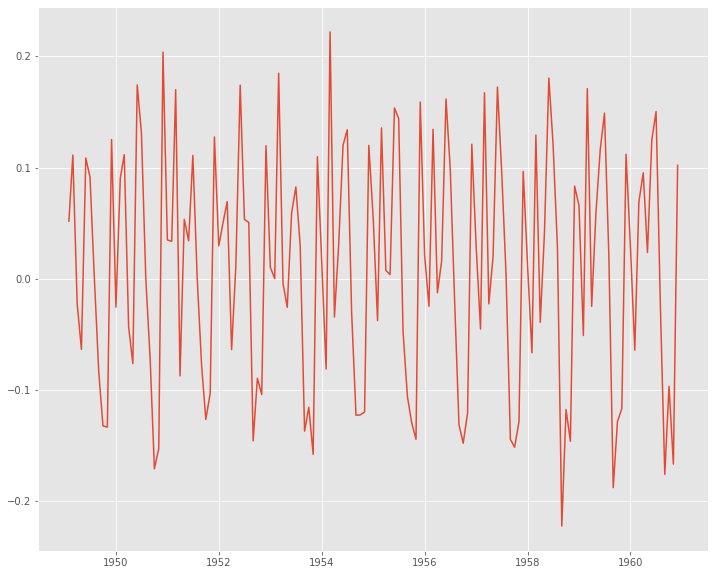

In [33]:
plt.figure(figsize=(12, 10))
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)

#### Обещанный тест Дики-Фуллера

In [34]:
from statsmodels.tsa.stattools import adfuller

def test_ts_stationarity(ts):
    ma = ts.rolling(12).mean()
    std = ts.rolling(12).std()
    plt.figure(figsize=(12, 10))
    orig = plt.plot(ts, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling mean')
    std = plt.plot(std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & std")
    plt.show()
    #adf test
    print("Results of DF test:")
    dftest = adfuller(ts, autolag='AIC')
    df_test = pd.DataFrame(dftest[:-1])
    df_test.index = ['Test statistic', 'p_value', 'lags', 'num observations', 'critical values']
    print(df_test)

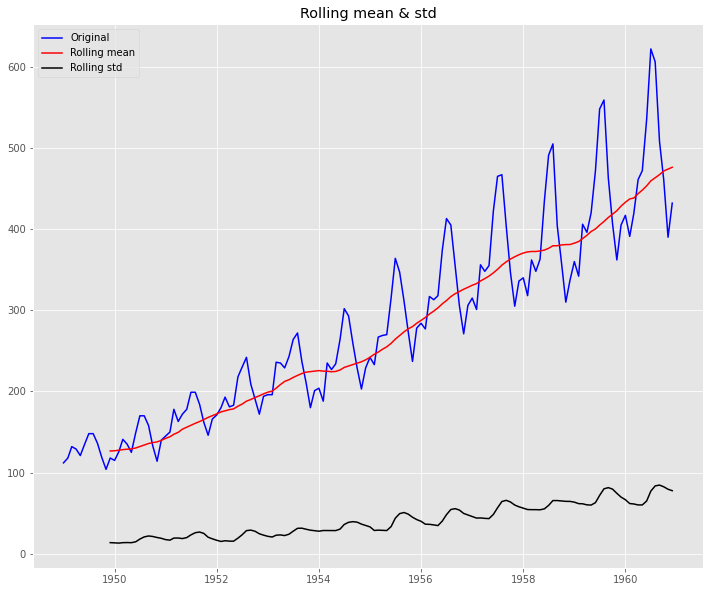

Results of DF test:
                                                                  0
Test statistic                                             0.815369
p_value                                                     0.99188
lags                                                             13
num observations                                                130
critical values   {'1%': -3.4816817173418295, '5%': -2.884041834...


In [35]:
test_ts_stationarity(ts)

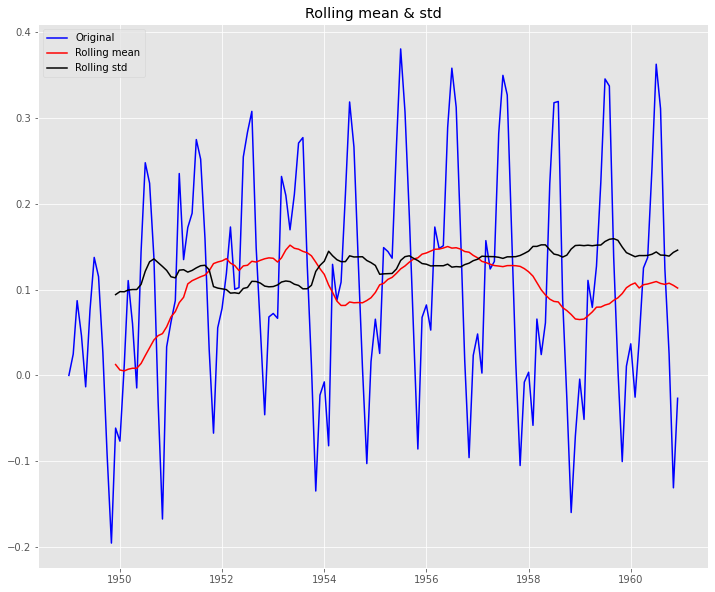

Results of DF test:
                                                                  0
Test statistic                                             -3.56699
p_value                                                   0.0064243
lags                                                             13
num observations                                                130
critical values   {'1%': -3.4816817173418295, '5%': -2.884041834...


In [36]:
test_ts_stationarity(ts_log_ewma_diff)

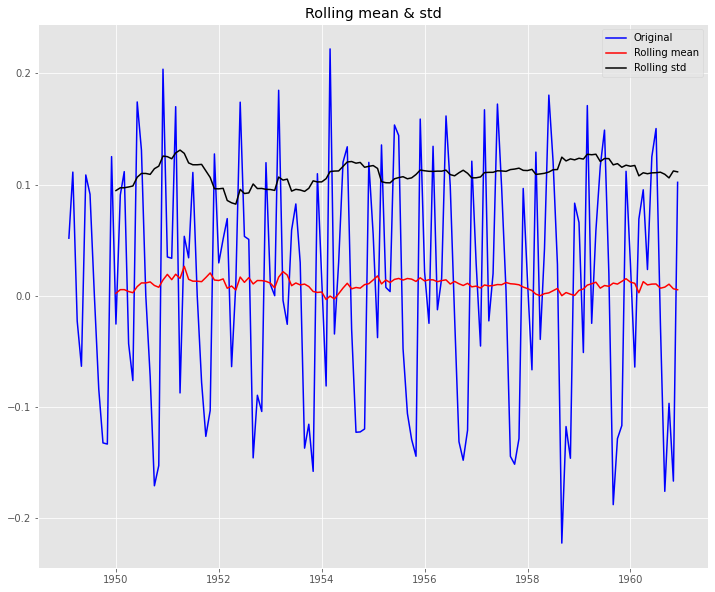

Results of DF test:
                                                                  0
Test statistic                                             -2.72195
p_value                                                   0.0703169
lags                                                             14
num observations                                                128
critical values   {'1%': -3.4825006939887997, '5%': -2.884397984...


In [37]:
test_ts_stationarity(ts_log_diff)

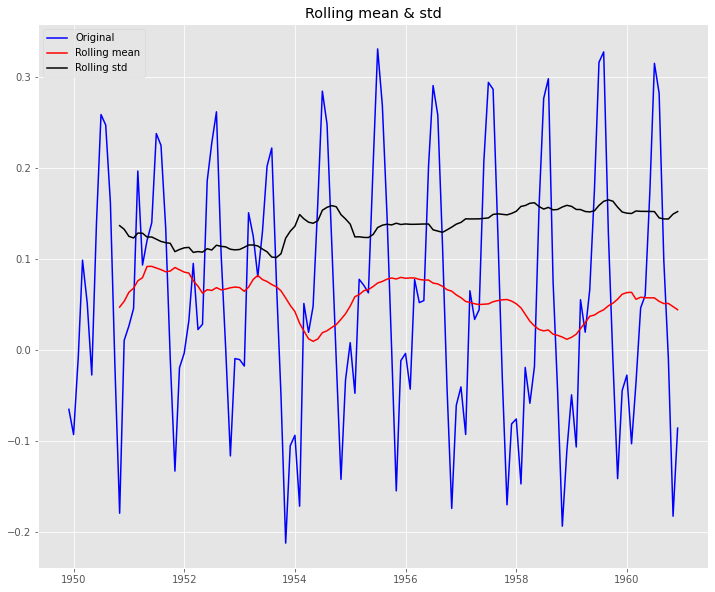

Results of DF test:
                                                                  0
Test statistic                                             -3.16826
p_value                                                    0.021897
lags                                                             13
num observations                                                119
critical values   {'1%': -3.4865346059036564, '5%': -2.886150985...


In [38]:
test_ts_stationarity(ts_log_ma_diff)

### Сезонность

Метод:
1. находим тренд с помощью скользящего среднего
2. убираем тренд и оцениваем коэффициенты сезонности
3. убираем их и получаем ряд, который должен быть стационарным

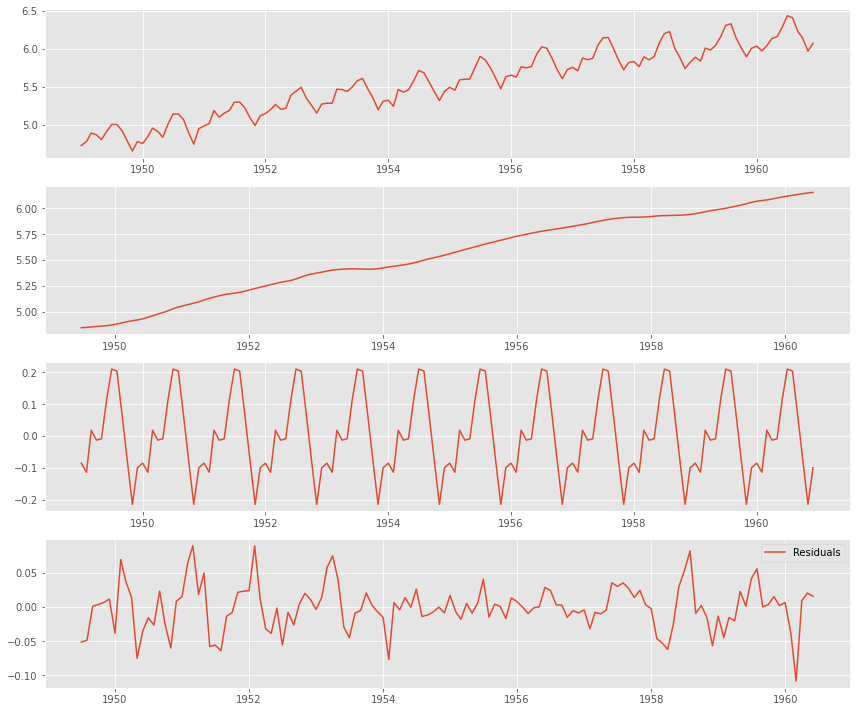

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(ts_log)
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

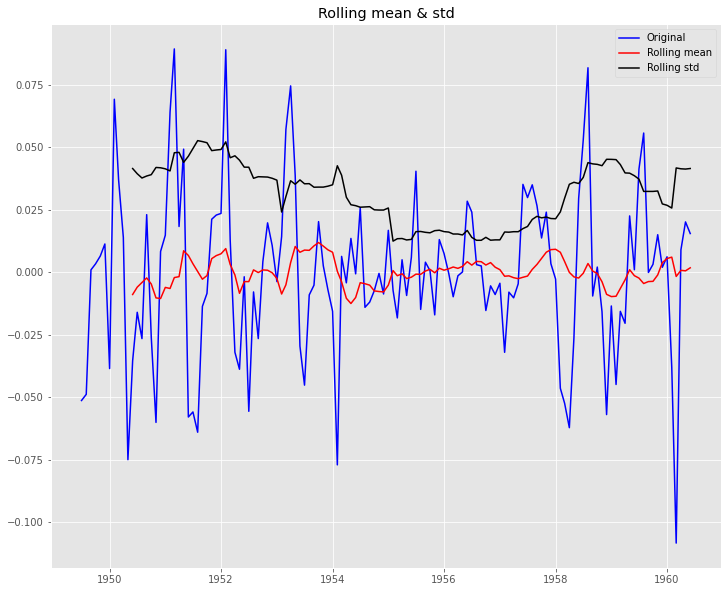

Results of DF test:
                                                                  0
Test statistic                                             -6.34771
p_value                                                 2.65753e-08
lags                                                              9
num observations                                                122
critical values   {'1%': -3.4851223522012855, '5%': -2.885537500...


In [40]:
test_ts_stationarity(residuals.dropna())

### Модель авторегрессии AR

$$ y_t=\sum_{i=1}^pb_iy_{t-i}+\epsilon_t $$

Text(0.5, 1.0, 'RSS: 1.4894')

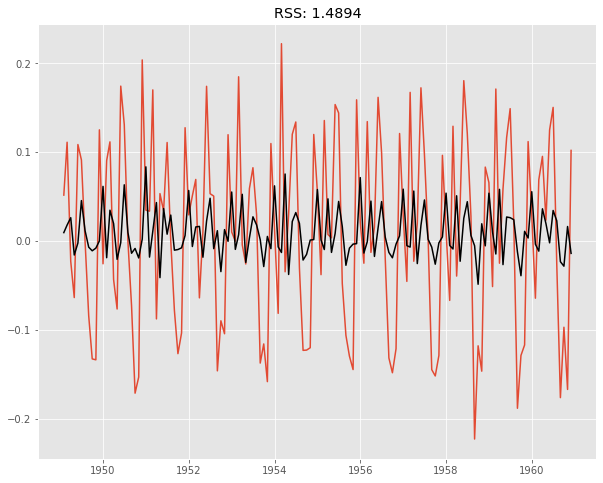

In [41]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(10,8))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='black')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

Автокорреляционная функция процесса авторегрессии затухает с увеличением лага, частная автокорреляционная функция равна 0 для лагов больше p

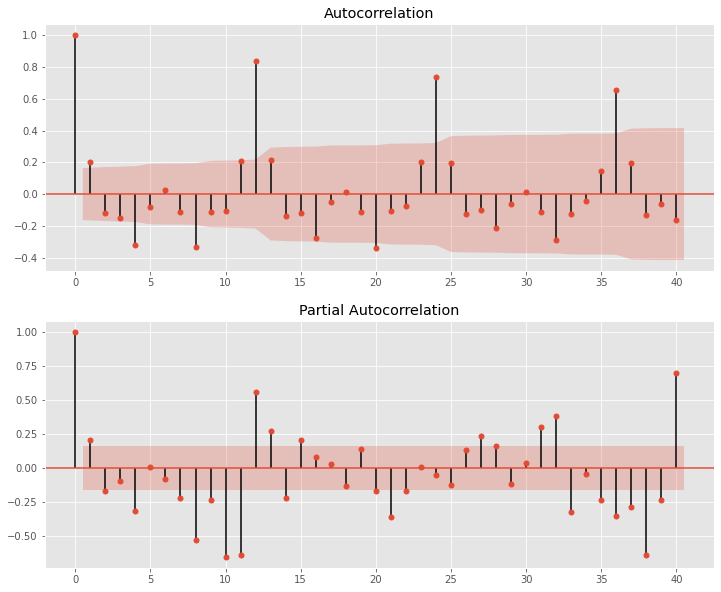

In [42]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=40, ax=ax2)

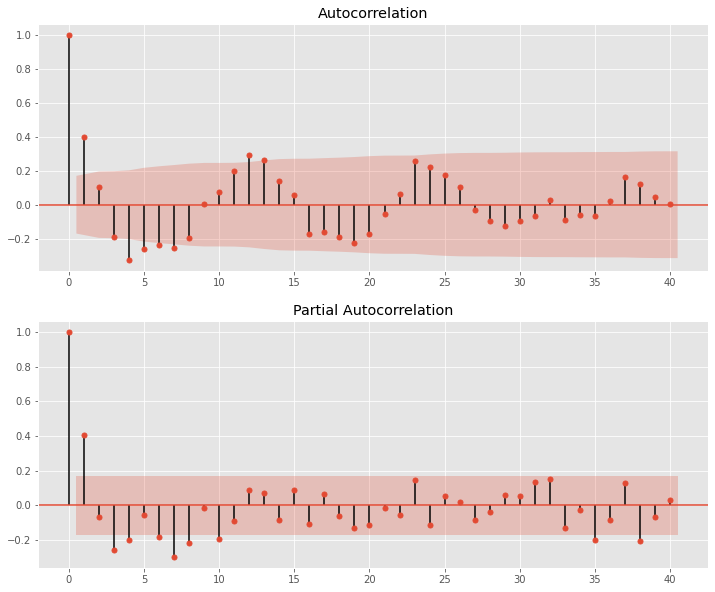

In [43]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=40, ax=ax2)

### модель скользящего среднего MA

Значение процесса в момент времени t - авторегрессия на шум за период q:

$$ y_t=\epsilon_t+\sum_{i=1}^qb_i\epsilon_{t-i} $$

ACF после q равна 0. PACF - убывает

Text(0.5, 1.0, 'RSS: 1.4596')

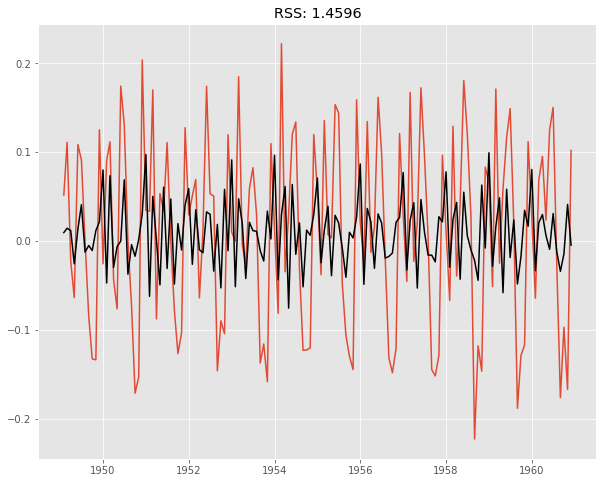

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(10,8))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='black')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

### ARIMA = AR+I+MA

Объядиняет 2 предыдущие модели и параметр интеграции I (степень или порядок разности ряда)

$$ \Delta^Ky_t = \epsilon_t+\sum_{i=1}^p\rho_i\Delta^Ky_{t-i}+\sum_{j=1}^qb_j\Delta^K\epsilon_{t-j}$$

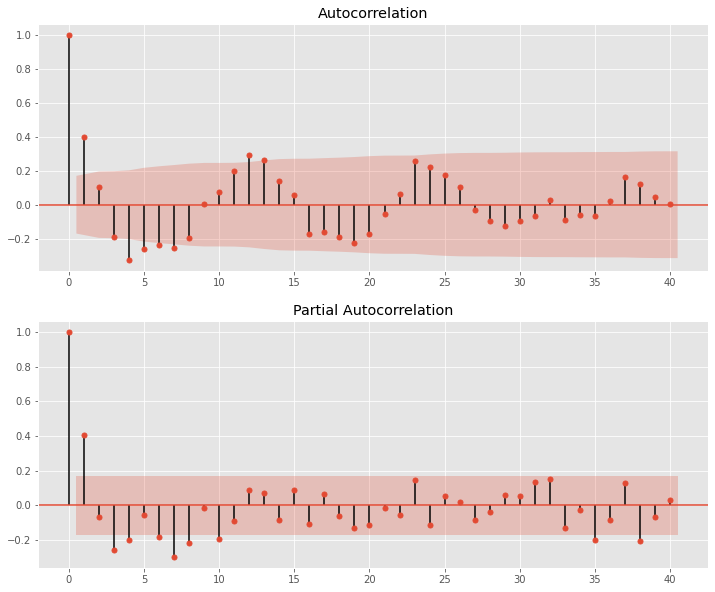

In [45]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=40, ax=ax2)

Обучим наконец ARIMA

In [46]:
model = sm.tsa.ARIMA(residuals.dropna(), order=(2,0,1))
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  132
Model:                     ARMA(2, 1)   Log Likelihood                 288.074
Method:                       css-mle   S.D. of innovations              0.027
Date:                Fri, 10 Jul 2020   AIC                           -566.149
Time:                        10:13:56   BIC                           -551.735
Sample:                    07-01-1949   HQIC                          -560.292
                         - 06-01-1960                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0001      0.000      0.581      0.561      -0.000       0.001
ar.L1.resid     1.2706      0.073     17.287      0.000       1.127       1.415
ar.L2.resid    -0.5395      0.074     -7.313      0.000      -0.684      -0.395
ma.L1.resid    -1.0000      0.021    -48.124      0.000      -1.041      -0.959
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1775           -0.6834j            1.3614           -0.0837
AR.2            1.1775           +0.6834j            1.3614            0.0837
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

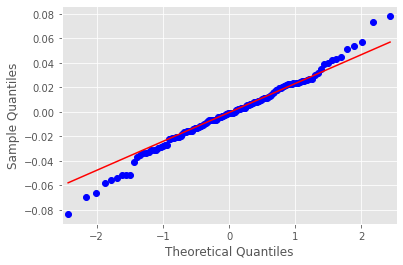

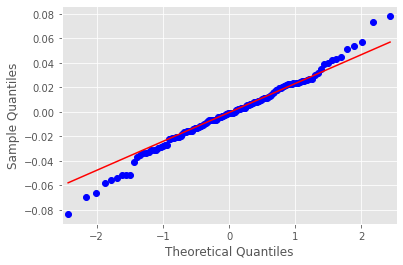

In [47]:
sm.qqplot(fitted_model.resid.values, line='q')

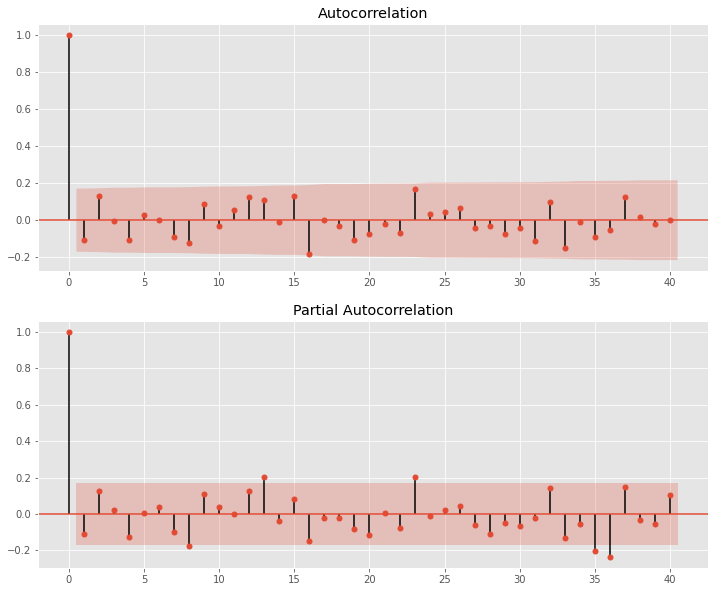

In [48]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(fitted_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(fitted_model.resid, lags=40, ax=ax2)

Прогнозы получить легко

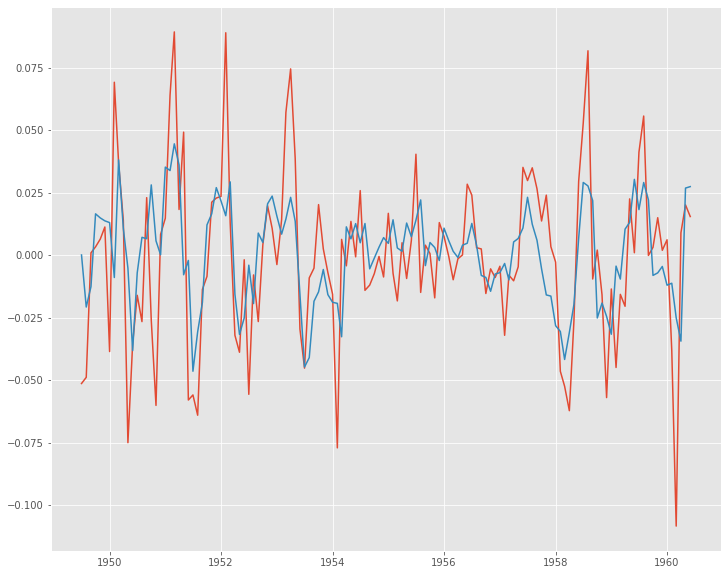

In [49]:
plt.figure(figsize=(12, 10))
preds = fitted_model.predict()
plt.plot(residuals)
plt.plot(preds)

Обучим ARIMA на исходном ряде

In [50]:
model = sm.tsa.ARIMA(ts_log, order=(2,1,1))
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 140.733
Method:                       css-mle   S.D. of innovations              0.089
Date:                Fri, 10 Jul 2020   AIC                           -271.466
Time:                        10:13:57   BIC                           -256.651
Sample:                    02-01-1949   HQIC                          -265.446
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0100      0.000     23.540      0.000       0.009       0.011
ar.L1.D.Passengers     0.9985      0.076     13.170      0.000       0.850       1.147
ar.L2.D.Passengers    -0.4141      0.077     -5.394      0.000      -0.565      -0.264
ma.L1.D.Passengers    -1.0000      0.028    -35.698      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2056           -0.9805j            1.5540           -0.1087
AR.2            1.2056           +0.9805j            1.5540            0.1087
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Как сделать прогноз на неделю вперед?

In [51]:
start = 142
end = 149
preds = fitted_model.predict(start=start, end=end, typ='levels')

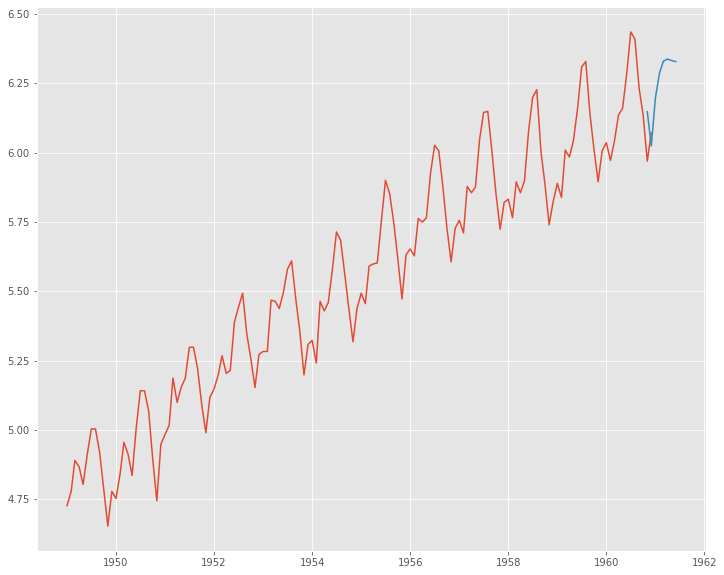

In [52]:
plt.figure(figsize=(12, 10))
plt.plot(ts_log)
plt.plot(preds)